In [59]:
import pandas as pd
from gender_detector import gender_detector as gd
import gender_guesser.detector as gender

In [60]:
df = pd.read_csv('df_clean.csv')


In [61]:
d = gender.Detector(case_sensitive=False)

In [62]:
gender = []
for name in list(df['Name']):
    gender.append(d.get_gender(u"{}".format(name), u'usa'))
df['Gender'] = gender

In [63]:
df.loc[df['Gender'] == "mostly_female", 'Gender']="female"
df.loc[df['Gender'] == "mostly_male", 'Gender']="male"
df_known = df[df['Gender'] != 'unknown']
df_known = df_known[df_known['Gender'] != 'andy']

In [105]:
df_year = df_known.groupby(['Year', 'sentimentclass']).size().unstack(level=1)

In [166]:
df_year

sentimentclass,negative,neutral,positive
Year,,,
2016,563,495,860
2017,1386,745,1306
2018,1371,586,1272


<AxesSubplot:title={'center':'Figure 3. Number of tweets per year (2016-2018)'}, xlabel='Year'>

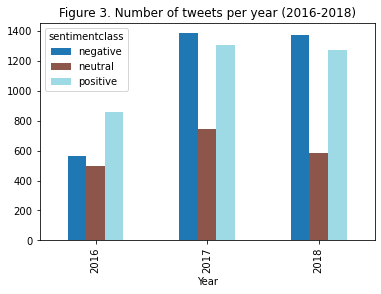

In [160]:
df_year.plot(kind = 'bar', colormap='tab20', title="Figure 3. Number of tweets per year (2016-2018)", xlabel="Year")

In [102]:
df_gender = df_known.groupby(['Year', 'sentimentclass', 'Gender']).size().unstack(level=2)

<AxesSubplot:title={'center':'Figure 4. Number of tweets per gender (2016-2018)'}, xlabel='Year and Sentiment Class'>

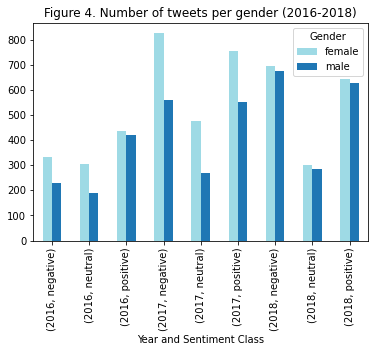

In [162]:
df_gender.plot(kind = 'bar', colormap='tab20_r', title="Figure 4. Number of tweets per gender (2016-2018)", xlabel="Year and Sentiment Class")

In [165]:
df_known.to_csv("df_gender.csv", encoding='utf-8-sig', index=False)